In [1]:
from IPython.display import HTML, display, Image
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

SMALL_SIZE = 15
MEDIUM_SIZE = 16
LARGE_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

## Python Linear Models Introduction

An introduction to using linear machine learning models in Python to make predictions



### Learning Objectives

1. **Create a Model** - Use sklearn's implementation to create and train a simple linear regression model

2. **Coefficients** - Interpret coefficients of Linear Regression

3. **Model Validation** - Validate Linear Regression Predictions

Read the objectives

### Introduction

In this lesson, we will explore the use of machine learning models to predict a "target" (also called a dependent variable or a response variable) from one or more data "features" (also called independent variables or predictor variables).

### Introducing "Linear Regression"

Here we will focus on a model called "Linear Regression".

The name is descriptive, in that to use it we need to assume that the relationship of the target to the features is linear. And "regression" means the target is a numeric value.

Linear Regression is an example of supervised learning, since we can train the model with data in which the targets (also called "labels") are known.

### Models

* A machine learning model can predict as-yet unknown information
* A supervised learning model uses known information to "learn" how to predict
* This is powerful, as we can "see into the future"
* A business may save a lot of money if it can predict in this way

### How do models work?

* Models use algorithms to process data
* When a model is given known data, it adjusts its internal settings
* These are known as "parameters"
* Later, that model can make predictions about new, unseen data

### Dependent and independent variables

* The information we want to predict is called the "target"
* The target depends on independent variables called "features"

Note that there can be many features that contribute to predicting a target.

We depend on there being a "relationship" between the features and the target.

### What is a linear relationship?

In this lesson, we are looking at special relationships between features and a target.

These relationships are assumed to be "linear" - what does this mean?

### Graphing a linear relationship

Perhaps the simplest way to understand a linear relationship is to use a graph:

<center>
<img src="./images/simple_lr_graph_perfect.png" alt="simple scatter graph where points line up perfectly" align="center" style="width: 256px;"/>
</center>

Let's call the X axis a feature and the Y axis the target. In a perfect linear relationship, all data points lie exactly on a straight line.

### Real-world linear relationships

But real-world data is not perfect. Here is what real data might look like

<center>
<img src="./images/simple_lr_graph.png" alt="simple scatter graph where points do not line up perfectly" align="center" style="width: 256px;"/>
</center>

Is this still linear?

Yes! We can still treat this data as linear.

There is clearly a linear trend there, even if not perfect.

### Linear Regression in action

Since real-world data does not supply perfect linear relationships, the job of the model is to find a line that is the "best fit".

<center>
<img src="./images/simple_lr_graph_fit.png" alt="simple_lr_graph_fit" align="center" style="width: 256px;"/>
</center>
 
Note that the distance from each point to the line is indicated by the small vertical lines. These show how the real data differs from its linear model. These differences are called "residuals".

Consider asking the class, "Do predictions always lie on this line?"

### A concrete example

Let's look at a simple example - height vs. shoe size:

<center>
<img src="./images/simple_lr_graph_shoe_size.png" alt="simple_lr_graph_shoe_size" align="center" style="width: 256px;"/>
</center>

This is "linear enough" to be valuable and will produce pretty good predictions.

(0.0, 11.0)

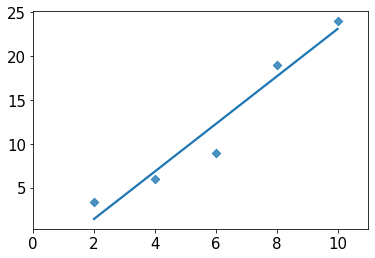

In [2]:
# This is "linear enough" to be valuable and will produce pretty good predictions.
# Note: sns.regplot() will automatically draw a straight line of 'best fit' on top of our datapoint. 
# We will learn how to compute the equation of this line a bit later.

x,y = np.array([2,4,6,8,10]), np.array([3.4,6,9,19,24])


ax = sns.regplot(x=x, y=y, ci=None, marker='D')
ax.set_xlim(0,11)

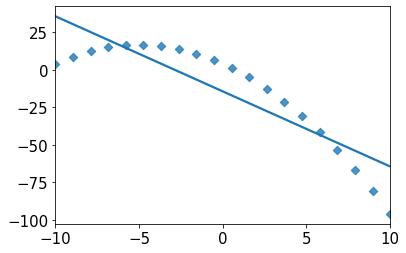

In [3]:
# Now let's look an an example that is definitely NOT linear.
x = np.linspace(-10,10,20)
y = 4- 5*x - 0.5*x**2 #parabola 
ax = sns.regplot(x=x, y=y, ci=None, marker='D')

Without doing more preprocessing on your data, this example would produce poor results in a linear model.

### Checks for Understanding

1. How does a simple Linear Regression model learn from training data?


2. What is the difference between a target and a feature?


3. What constitutes a "linear relationship"?

### Using the equation of a line for prediction

The equation of a line, which is enough for simple Linear Regression, is $y = mx + b$. There are two coefficients, $m$ and $b$.

This can be written with two new coefficients $\beta_0$ and $\beta_1$

$\hat{y}_i = \beta_0 + \beta_1 x_i$ 

Now $\beta_0$ is the y-intercept and $\beta_1$ is the slope. 

Here, $\hat{y}_i$ is the predicted output of the model for each sample, $x_i$. The betas are the coefficients of the model. 

Once you have estimated the betas you then can use them to make predictions of your target y for values of x is that are not a part of your dataset

## Check for Understanding

Suppose, for a sample dataset, our best fit line gives estimates of $\beta_0$ = 2 and $\beta_1$ = 5

Predict $\hat{y}_i$ for $x_i$ = 4.

In [4]:
2 + 5*4

22

### An actual example

Let's take a look at doing a real Linear Regression. Let's we read the data and take a look at a bit of it...

In [5]:
import os
filename = 'cars_multivariate.csv'
path = os.path.join('.','data')

filepath = os.path.join(path, filename)
df_full = pd.read_csv(filepath)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


This dataset is obviously about cars. But what should we do with it? 

What might we want to predict?

### Let's make a linear model to try to predict mpg using the weight of the car.
Our data consists of $i$ = 398 different cars, one per row. 

Let's do a simple linear regression to predict mpg, using one feature at first. 

So we'll take $x_i$ = weight and $y_i$ = mpg

In [6]:
# Here, we make a new dataframe with only the columns we need.
df1 = df_full[['mpg', 'weight']]
df1.head()

,mpg,weight
0,18.0,3504.0
1,15.0,3693.0
2,18.0,3436.0
3,16.0,3433.0
4,17.0,3449.0


### Check for Understanding 
Using filename = 'admissions.csv' and filepath = './data'
    * Use pandas to load the admissions file into a dataframe called *admissions*
    * Make a NEW dataframe from the admissions dataframe that contains only the columns 'gre' and 'gpa'

### Always Plot Your Data

#### Even if no one explicitly tells you to plot it, plot it anyway. The time you dedicate to understanding your data is never wasted. 

Remember that Linear Regression assumes the data is linear. One way to tell is to graph the data and take a look...

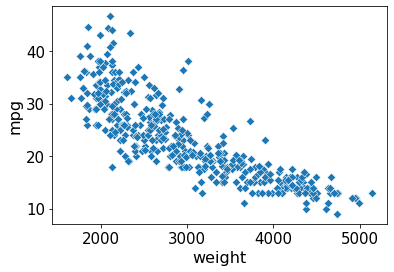

In [7]:
ax = sns.scatterplot(x='weight', y='mpg', data=df1, ci=None, marker='D')

<AxesSubplot:xlabel='weight', ylabel='mpg'>

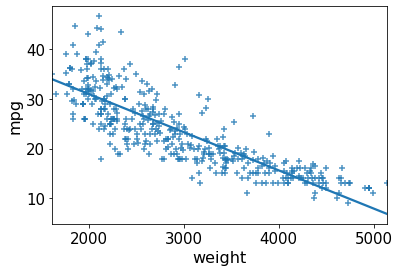

In [8]:
# let's add the line of best fit
sns.regplot(x='weight', y='mpg', data=df1, ci=None, marker='+')

### We are going to do a predictive model first, using the sklearn package. 

Given $x$ = df1['weight'] and $y$ = df1['mpg'], the model will find the coefficients $\beta_0$ and $\beta_1$ that give the line of best fit for  $\hat{y} = \beta_0 + \beta_1 x$ 

In [9]:
from sklearn.linear_model import LinearRegression
X = df1[['weight']] #the features must be fed in as a dataframe (or 2D numpy array) 
y = df1['mpg']     #the target must be fed in as a series (or 1D numpy array)

model = LinearRegression().fit(X, y)
# model parameters
print(model.intercept_, model.coef_)


46.31736442026563 [-0.00767661]



So $\beta_0$ = 46.32 , $\beta_1$ = -0.0077, and 

$\hat{y} = 46.32 - 0.0077 x$ 

So for a weight of 3,000, our prediction for mpg would be:

$\hat{y} = 46.32 - 0.0077 * 3000  = 23.2$

In [10]:
# let's define a function to graph our line using the model's predict() function
def draw_prediction_line(X,y, model, ax=None):
    import numpy as np
    if ax is None:
        _,ax = plt.subplots()
    
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = model.predict(x_vals)
    
    sns.scatterplot(x=X.values.flatten(), y=y, marker='d', ax=ax)
    return sns.lineplot(x=x_vals.flatten(), y=y_vals, ax=ax, color='red') 
    
    

<AxesSubplot:ylabel='mpg'>

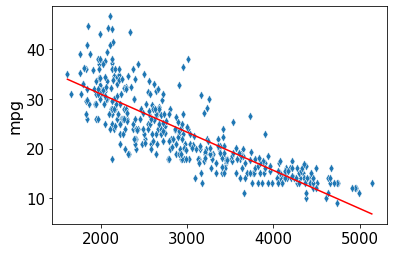

In [11]:
draw_prediction_line(X,y,model) #should look similar to sns.regplot()

### Check for Understanding 
Using the admissions data that you imported earlier, make a linear model that predicts a candidate's gre score given their gpa. 
* Which variable is the target?
* Which variable is the feature?
* What are the coefficients of your model?
    
    

### Multiple Linear Regression: Regression Using More than One Feature

So far, we have been working with just one feature. But linear regression can deal with any number of features!

With one feature we can show the results on a two dimensional graph as we did above. With two features, the line we drew becomes a plane in 3D space.

Beyond that, the math still works, but there are too many dimensions to visualize easily.

Use sns.pairplot() to graph your data features pairwise to see if there is a relationship

We will look at the columns ['mpg','displacement', 'horsepower', 'weight','acceleration']

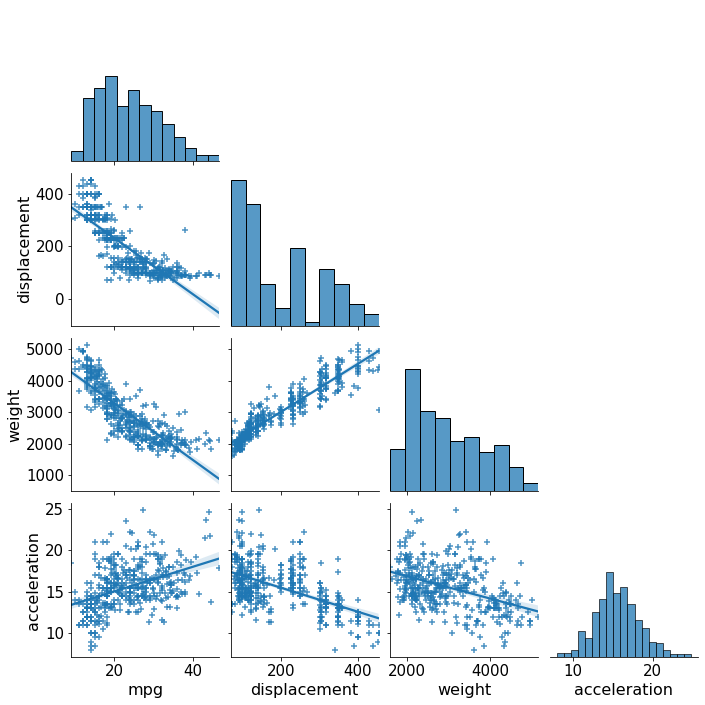

In [12]:
sns.pairplot(df_full[['mpg','displacement', 'horsepower', 'weight','acceleration']], 
             corner=True, kind='reg', markers='+') #kind='reg' means to draw regression plots

We can also do a heatmap of the correlations between the features and the target.

<AxesSubplot:>

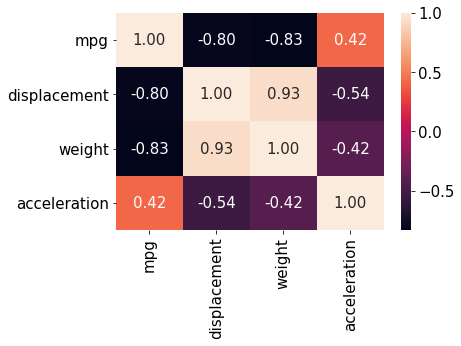

In [13]:
#  Heatmap confirms that the variables 'displacement' and 'weight' are negatively correlated with mpg, i.e. as displacement goes up, mpg goes down. 
sns.heatmap(df_full[['mpg','displacement', 'horsepower', 'weight','acceleration']].corr(), 
            annot=True, 
            fmt='0.2f')

## Multiple Linear Regression

Since displacement and weight are both highly correlated to our target mpg, let's do linear regression using both of these features. 

When you use two or more features to predict a target, it is called **multiple linear regression**. There could easily be tens or or even hundreds of features. 

If you have $p$ features, your model needs to estimate $p+1$ beta coefficients simultaneously.

the prediction equation would look like this:

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \ldots + \beta_p x_p$

In [14]:
# let's take p = 2

y2 = df_full['mpg'] # target
X2 = df_full[['displacement', 'weight']] # two features

Time to train our model. 

No matter how many features we use, the predictive model estimates the coefficients exactly as before!

In [15]:

model2 = LinearRegression().fit(X2, y2)

After training, we can ask the model for its parameters (beta coefficients)...

### Check for Understanding
* How many coefficients should we expect to get from this model?

In [16]:
# model parameters. Notice that we now have three coefficients, as expected.
model2.intercept_, model2.coef_

(43.900463757873474, array([-0.01635835, -0.00579774]))

Given $x_1 = displacement$,  $x_2 = weight$,  and $y = mpg$, 

After rounding, the coefficients $\beta_0$,  $\beta_1$ and $\beta_2$ that gave the line of best fit for model2 are: 

$\hat{y} = 43.9 - 0.0164 x_1 - 0.0058 x_2$

The coefficients for model2 are generally NOT related to the coefficients of our first model, and they should not be directly compared.

Now, for an important question: Which model is 'better'?
Answer: It depends! What does 'better' mean? The idea of 'better' will actually be different for different problems, so it is important that you actually spend some time defining what 'better' means BEFORE you do any modeling or analysis.

### A simplistic meaning of 'better' is a measurement called R-squared. 

In this simplistic framework, a model with an R-squared closer to one (1) is considered better than models with R-squared further away from one. 

In [17]:
from sklearn.metrics import r2_score

R-squared takes the actual (y) values and compares them to the model's computed predictions ($\hat{y}$) to see how good the model really is. First, get the predictions and visually compare them to the actuals...

Our first model was $\hat{y} = 46.32 - 0.0077 x$

In [18]:
y_hat_1 = model.predict(X)
r2_score(y, y_hat_1)

0.6917929800341573

Our second model was $\hat{y} = 43.9 - 0.0164 x_1 - 0.0058 x_2$

In [19]:
y_hat_2 = model2.predict(X2)
r2_score(y, y_hat_2)

0.6979764850769228

So, according to this simplistic R-squared score comparison, *model2* is a little bit better.

### Check for Understanding 
    * Compute the r-squared for the model you made earlier that predicts a candidate's gre score given their gpa
    

In [20]:
#An alternative metric, that is in the same units as the predictions (and is more easily interpretable as a goodness-of-fit measure), try the rootmean squared error...

from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y,y_hat_1, squared=False) #the first model

4.333698159150957

In [22]:
mean_squared_error(y,y_hat_2, squared=False) # the second model

4.290004770826327

So again, the second model has a slim edge using these simple measures of 'best fit'

### Checks for Understanding

* What parameters must be passed to the `fit` method of a `LinearRegression` object?


* What are some of the ways we can evaluate our model's ability to predict well?


* What was the purpose of the "heatmap" plot we did?